In [1]:
import datasets 

In [2]:
from datasets import load_dataset

In [3]:
huggingface_mrpc_dataset = load_dataset('glue', 'mrpc')
print(huggingface_mrpc_dataset)

Downloading:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.47k [00:00<?, ?B/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset glue downloaded and prepared to /aiffel/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})


In [4]:
train = huggingface_mrpc_dataset['train']
cols = train.column_names
cols

['sentence1', 'sentence2', 'label', 'idx']

In [5]:
# 안에 뭐가 있나 좀더 뜯어보자

for i in range(5):
    for col in cols:
        print(col, ":", train[col][i])
    print("\n")

sentence1 : Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .
sentence2 : Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .
label : 1
idx : 0


sentence1 : Yucaipa owned Dominick 's before selling the chain to Safeway in 1998 for $ 2.5 billion .
sentence2 : Yucaipa bought Dominick 's in 1995 for $ 693 million and sold it to Safeway for $ 1.8 billion in 1998 .
label : 0
idx : 1


sentence1 : They had published an advertisement on the Internet on June 10 , offering the cargo for sale , he added .
sentence2 : On June 10 , the ship 's owners had published an advertisement on the Internet , offering the explosives for sale .
label : 1
idx : 2


sentence1 : Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .
sentence2 : Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .
label : 0

## Huggingface에 원하는 데이터셋이 없다면?

- huggingface datasets api를 이용하면 데이터셋을 직접 만들 수 있다!

In [6]:
import tensorflow_datasets as tfds
from datasets import Dataset

tf_dataset, tf_dataset_info = tfds.load('glue/mrpc', with_info=True)

In [9]:
tf_dataset_info

tfds.core.DatasetInfo(
    name='glue',
    full_name='glue/mrpc/2.0.0',
    description="""
    GLUE, the General Language Understanding Evaluation benchmark
    (https://gluebenchmark.com/) is a collection of resources for training,
    evaluating, and analyzing natural language understanding systems.
    """,
    config_description="""
    The Microsoft Research Paraphrase Corpus (Dolan & Brockett, 2005) is a corpus of
    sentence pairs automatically extracted from online news sources, with human annotations
    for whether the sentences in the pair are semantically equivalent.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=52398',
    data_path='/aiffel/tensorflow_datasets/glue/mrpc/2.0.0',
    download_size=1.43 MiB,
    dataset_size=1.74 MiB,
    features=FeaturesDict({
        'idx': tf.int32,
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'sentence1': Text(shape=(), dtype=tf.string),
        'sentence2': Text(shap

In [7]:
examples = tf_dataset['train'].take(5)

for example in examples:
    for col in cols:
        print(col, ":", example[col])
    print('\n')

sentence1 : tf.Tensor(b'The identical rovers will act as robotic geologists , searching for evidence of past water .', shape=(), dtype=string)
sentence2 : tf.Tensor(b'The rovers act as robotic geologists , moving on six wheels .', shape=(), dtype=string)
label : tf.Tensor(0, shape=(), dtype=int64)
idx : tf.Tensor(1680, shape=(), dtype=int32)


sentence1 : tf.Tensor(b"Less than 20 percent of Boise 's sales would come from making lumber and paper after the OfficeMax purchase is completed .", shape=(), dtype=string)
sentence2 : tf.Tensor(b"Less than 20 percent of Boise 's sales would come from making lumber and paper after the OfficeMax purchase is complete , assuming those businesses aren 't sold .", shape=(), dtype=string)
label : tf.Tensor(0, shape=(), dtype=int64)
idx : tf.Tensor(1456, shape=(), dtype=int32)


sentence1 : tf.Tensor(b'Spider-Man snatched $ 114.7 million in its debut last year and went on to capture $ 403.7 million .', shape=(), dtype=string)
sentence2 : tf.Tensor(b'Spi

- 허깅페이스와의 차이점은 tf.Tensor로 묶여 있다는 점

In [11]:
#허길페이스 데이터셋처럼 tf dataset 재구성
#Tensorflow dataset 구조를 python dict으로 변경해보자

train_dataset = tfds.as_dataframe(tf_dataset['train'], tf_dataset_info)
val_dataset = tfds.as_dataframe(tf_dataset['validation'], tf_dataset_info)
test_dataset = tfds.as_dataframe(tf_dataset['test'], tf_dataset_info)

# dataframe 데이터를 dict 내부에 list로 변경
train_dataset = train_dataset.to_dict('list')
val_dataset = val_dataset.to_dict('list')
test_dataset = test_dataset.to_dict('list')

# 파이썬 딕셔너리 형태의 데이터를 Hugging Face의 Dataset 객체로 변환합니다.
tf_train_dataset = Dataset.from_dict(train_dataset)
tf_val_dataset = Dataset.from_dict(val_dataset)
tf_test_dataset = Dataset.from_dict(test_dataset)

In [12]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [14]:
huggingface_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
huggingface_model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [15]:
def transform(data):
    return huggingface_tokenizer(data['sentence1'], data['sentence2'], truncation = True, padding = 'max_length', return_token_type_ids = False)

return_token_type_ids는 문장이 한개이상일 때 나뉘는걸 보여줍니다. (해당 내용은 task에 필요없으므로 제거합니다)

In [16]:
# map = 각 데이터포인트에 대해 함수를 적용. batched = True로 하면 여러 예제를 한번에 처리해서 성능 향상 가능. 

In [17]:
hf_dataset = huggingface_mrpc_dataset.map(transform, batched = True)

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [18]:
hf_dataset

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence1', 'sentence2'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence1', 'sentence2'],
        num_rows: 408
    })
    test: Dataset({
        features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence1', 'sentence2'],
        num_rows: 1725
    })
})

In [19]:
hf_train_dataset = hf_dataset['train']
hf_val_dataset = hf_dataset['validation']
hf_test_dataset = hf_dataset['test']

In [20]:
hf_train_dataset

Dataset({
    features: ['attention_mask', 'idx', 'input_ids', 'label', 'sentence1', 'sentence2'],
    num_rows: 3668
})

In [22]:
# 실험 - tfds의 mrpc로 만든 거 그대로 적용하면?

exp_dataset = tf_train_dataset.map(transform, batched = True)

  0%|          | 0/4 [00:00<?, ?ba/s]

ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [23]:
def transform_tf(batch):
    sentence1 = [s.decode('utf-8') for s in batch['sentence1']]
    sentence2 = [s.decode('utf-8') for s in batch['sentence2']]
    return huggingface_tokenizer(sentence1, sentence2, truncation=True, padding = 'max_length', return_token_type_ids =False)

tf_train_dataset = tf_train_dataset.map(transform_tf, batched = True)
tf_val_dataset = tf_val_dataset.map(transform_tf, batched=True)
tf_test_dataset = tf_test_dataset.map(transform_tf, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [24]:
# trainingargument 통해 학습 설정 미리 지정하기 - trainer 사용해야 하니까!

import os
import numpy as np
from transformers import Trainer, TrainingArguments

output_dir = os.getenv('HOME')+'/aiffel/transformers'

In [25]:
training_arguments = TrainingArguments(output_dir, evaluation_strategy = "epoch", learning_rate = 2e-5, 
                                      per_device_train_batch_size = 8, per_device_eval_batch_size = 8, num_train_epochs = 3, 
                                      weight_decay = 0.01)

In [26]:
from datasets import load_metric
metric = load_metric('glue', 'mrpc')

def compute_metrics(eval_pred): #(predictions, labels) 즉 (예측값, 실제 정답 레이블)
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis = 1)  #prediction은 (batch_size, num_classes)로 되어 있기 때문
    return metric.compute(predictions = predictions, references = labels) #처리된 예측값과 실제레이블로 메트릭 계산

Downloading:   0%|          | 0.00/1.86k [00:00<?, ?B/s]

trainer = Trainer(model = huggingface_model, args = training_arguments, train_dataset = hf_train_dataset, eval_dataset = hf_val_dataset, 
                  compute_metrics = compute_metrics)
trainer.train()  #학습 시작! 

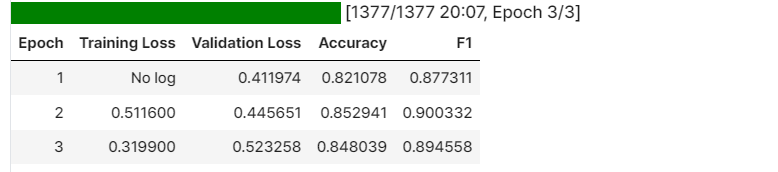

In [28]:
trainer.evaluate(hf_test_dataset)

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2.
***** Running Evaluation *****
  Num examples = 1725
  Batch size = 8


{'eval_loss': 0.5580241084098816,
 'eval_accuracy': 0.8342028985507246,
 'eval_f1': 0.8795282224094354,
 'eval_runtime': 56.1141,
 'eval_samples_per_second': 30.741,
 'eval_steps_per_second': 3.849,
 'epoch': 3.0}

In [29]:
#우리가 만든 커스텀 데이터셋으로도 진행해보기. 일단 메모리부터 지우자
del huggingface_model

In [31]:
huggingface_model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 2)

trainer = Trainer(model = huggingface_model, args = training_arguments, 
                 train_dataset = tf_train_dataset, eval_dataset = tf_val_dataset, compute_metrics = compute_metrics)

trainer.train()

loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /aiffel/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.11.3",
  "vocab_size": 30522
}

loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /aiffel/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.473921,0.835784,0.890344
2,0.492500,0.405521,0.852941,0.897260
3,0.311500,0.537570,0.852941,0.897260


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2.
***** Running Evaluation *****
  Num examples = 408
  Batch size = 8
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2.
***** Running Evaluation *****
  Num examples = 408
  Batch size = 8
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1000/pytorch_model.bin
The following columns in the evalua

TrainOutput(global_step=1377, training_loss=0.35238061266354054, metrics={'train_runtime': 1233.0998, 'train_samples_per_second': 8.924, 'train_steps_per_second': 1.117, 'total_flos': 1457671254810624.0, 'train_loss': 0.35238061266354054, 'epoch': 3.0})

In [33]:
trainer.evaluate(tf_test_dataset)

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2.
***** Running Evaluation *****
  Num examples = 1725
  Batch size = 8
/pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: cunn_ClassNLLCriterion_updateOutput_kernel: block: [0,0,0], thread: [0,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: cunn_ClassNLLCriterion_updateOutput_kernel: block: [0,0,0], thread: [1,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: cunn_ClassNLLCriterion_updateOutput_kernel: block: [0,0,0], thread: [2,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: cunn_ClassNLLCriterion_updateOutput_kernel: block: [0,0,0], thread: [3,0,0] Assertion `t >= 0 && t < n_classes` failed.
/pytorch/aten/src/THCUNN/ClassNLLCriterion.cu:108: cunn_ClassNLLCr

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

# 아이펠 프로젝트: 커스텀 프로젝트

In [19]:
import tensorflow as tf
import numpy as np
import transformers
import datasets

print(tensorflow.__version__)
print(numpy.__version__)
print(transformers.__version__)
print(datasets.__version__)

2.6.0
1.21.4
4.11.3
1.14.0


In [5]:
dataset = load_dataset("e9t/nsmc")
print(dataset)

Downloading:   0%|          | 0.00/3.18k [00:00<?, ?B/s]

Using custom data configuration default


  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/6.33M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.89M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset nsmc downloaded and prepared to /aiffel/.cache/huggingface/datasets/e9t___nsmc)/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})


In [6]:
train = dataset['train']
cols = train.column_names
cols

['id', 'document', 'label']

In [13]:
len(dataset['train']['document'])

150000

In [14]:
dataset['train']['document'][1]

'흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나'

In [7]:
test = dataset['test']
cols_test = test.column_names
cols_test

['id', 'document', 'label']

In [8]:
# 안에 뭐가 있나 좀더 뜯어보자
#label 1은 긍정, 0은 부정이란 뜻
for i in range(5):
    for col in cols:
        print(col, ":", train[col][i])
    print("\n")

id : 9976970
document : 아 더빙.. 진짜 짜증나네요 목소리
label : 0


id : 3819312
document : 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
label : 1


id : 10265843
document : 너무재밓었다그래서보는것을추천한다
label : 0


id : 9045019
document : 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
label : 0


id : 6483659
document : 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
label : 1




In [37]:
#del huggingface_model

In [38]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [39]:
huggingface_model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base', num_labels = 2)

loading configuration file https://huggingface.co/klue/bert-base/resolve/main/config.json from cache at /aiffel/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

loading weights file https://huggingface.co/klue/bert-base/resolve/main/pytorch_model.bin from cache at /aiffel/.cache/huggingface/transform

In [40]:
# 안에 뭐가 있나 좀더 뜯어보자
#label 1은 긍정, 0은 부정이란 뜻

temp_list = list()

for i in  range(200):
    sentence_len = len(dataset['train']['document'][i])
    temp_list.append(sentence_len)

In [41]:
# 중앙값 (50% 값)
median = np.median(temp_list)

# 75% 값
percentile_75 = np.percentile(temp_list, 75)

# 90% 값
percentile_90 = np.percentile(temp_list, 90)

print(f"중앙값: {median}")
print(f"75% 값: {percentile_75}")
print(f"90% 값: {percentile_90}")

중앙값: 27.0
75% 값: 43.25
90% 값: 83.29999999999998


In [42]:
huggingface_tokenizer = AutoTokenizer.from_pretrained('klue/bert-base', model_max_length = 80)

loading configuration file https://huggingface.co/klue/bert-base/resolve/main/config.json from cache at /aiffel/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

loading file https://huggingface.co/klue/bert-base/resolve/main/vocab.txt from cache at /aiffel/.cache/huggingface/transformers/1a36e69d48a0

In [43]:
def transform(data):
    return huggingface_tokenizer(data['document'], truncation = True, padding = 'max_length', return_token_type_ids = False)

In [44]:
dataset_agn = dataset.map(transform, batched = True)

Loading cached processed dataset at /aiffel/.cache/huggingface/datasets/e9t___nsmc)/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3/cache-2f07fccdbf83c6e2.arrow


  0%|          | 0/50 [00:00<?, ?ba/s]

In [45]:
dataset_agn

DatasetDict({
    train: Dataset({
        features: ['attention_mask', 'document', 'id', 'input_ids', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['attention_mask', 'document', 'id', 'input_ids', 'label'],
        num_rows: 50000
    })
})

In [46]:
train_dataset = dataset_agn['train']
test_dataset = dataset_agn['test']

In [53]:
#학습시간 좀 줄이자,,
train_dataset_1 = train_dataset.select(range(10000))  # 예: 처음 10,000개 샘플만 사용
test_dataset_1 = test_dataset.select(range(1000))     # 예: 처음 1,000개 샘플만 사용

In [54]:
train_dataset_1

Dataset({
    features: ['attention_mask', 'document', 'id', 'input_ids', 'label'],
    num_rows: 10000
})

In [48]:
import os
import numpy as np
from transformers import Trainer, TrainingArguments

output_dir = os.getenv('HOME')+'/aiffel/transformers'

In [49]:
training_arguments = TrainingArguments(output_dir, evaluation_strategy = "epoch", learning_rate = 2e-5, 
                                      per_device_train_batch_size = 8, per_device_eval_batch_size = 8, num_train_epochs = 3, 
                                      weight_decay = 0.01)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [50]:
# 평가 지표 갖고오기
from datasets import load_metric

accuracy = load_metric("accuracy")
f1 = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis = -1)
    acc = accuracy.compute(predictions = predictions, references = labels)
    f1_score = f1.compute(predictions = predictions, references = labels, average = 'binary')
    return {"accuracy": acc["accuracy"], "f1": f1_score["f1"]}

In [56]:
trainer = Trainer(model = huggingface_model, args = training_arguments, train_dataset = train_dataset_1, eval_dataset = test_dataset_1, compute_metrics = compute_metrics) 
trainer.train() 

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running training *****
  Num examples = 10000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3750


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.378200,0.389646,0.863000,0.867377
2,0.247700,0.559058,0.856000,0.861004
3,0.142300,0.664279,0.860000,0.863813


Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-2

TrainOutput(global_step=3750, training_loss=0.2627376230875651, metrics={'train_runtime': 637.2116, 'train_samples_per_second': 47.08, 'train_steps_per_second': 5.885, 'total_flos': 1233333072000000.0, 'train_loss': 0.2627376230875651, 'epoch': 3.0})

In [57]:
trainer.evaluate(test_dataset_1)

The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8


{'eval_loss': 0.6642786860466003,
 'eval_accuracy': 0.86,
 'eval_f1': 0.8638132295719845,
 'eval_runtime': 4.8377,
 'eval_samples_per_second': 206.709,
 'eval_steps_per_second': 25.839,
 'epoch': 3.0}

# 두 번째 시도!

In [113]:
del huggingface_model

In [114]:
dataset = load_dataset("e9t/nsmc")
print(dataset)

Using custom data configuration default
Reusing dataset nsmc (/aiffel/.cache/huggingface/datasets/e9t___nsmc)/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['id', 'document', 'label'],
        num_rows: 50000
    })
})


In [115]:
huggingface_model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base', num_labels = 2)

loading configuration file https://huggingface.co/klue/bert-base/resolve/main/config.json from cache at /aiffel/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

loading weights file https://huggingface.co/klue/bert-base/resolve/main/pytorch_model.bin from cache at /aiffel/.cache/huggingface/transform

In [116]:
huggingface_tokenizer = AutoTokenizer.from_pretrained('klue/bert-base', max_padding = 85)

loading configuration file https://huggingface.co/klue/bert-base/resolve/main/config.json from cache at /aiffel/.cache/huggingface/transformers/fbd0b2ef898c4653902683fea8cc0dd99bf43f0e082645b913cda3b92429d1bb.99b3298ed554f2ad731c27cdb11a6215f39b90bc845ff5ce709bb4e74ba45621
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.11.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

loading file https://huggingface.co/klue/bert-base/resolve/main/vocab.txt from cache at /aiffel/.cache/huggingface/transformers/1a36e69d48a0

In [117]:
def transform(data):
    return huggingface_tokenizer(data['document'], truncation = True, padding = 'max_length', return_token_type_ids = False)

In [118]:
dataset_agn2 = dataset.map(transform, batched = True)

Loading cached processed dataset at /aiffel/.cache/huggingface/datasets/e9t___nsmc)/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3/cache-b98ed598628e8310.arrow


  0%|          | 0/50 [00:00<?, ?ba/s]

In [119]:
train_dataset = dataset_agn2['train']
test_dataset = dataset_agn2['test']

In [120]:
train_dataset_2 = train_dataset.select(range(10000))  # 예: 처음 10,000개 샘플만 사용
test_dataset_2 = test_dataset.select(range(1000))     # 예: 처음 1,000개 샘플만 사용

In [121]:
training_arguments = TrainingArguments(output_dir, evaluation_strategy = "epoch", learning_rate = 2e-5, 
                                      per_device_train_batch_size = 8, per_device_eval_batch_size = 8, num_train_epochs = 3, 
                                      weight_decay = 0.01)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [122]:
from datasets import load_metric

accuracy = load_metric("accuracy")
f1 = load_metric("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis = -1)
    acc = accuracy.compute(predictions = predictions, references = labels)
    f1_score = f1.compute(predictions = predictions, references = labels, average = 'binary')
    return {"accuracy": acc["accuracy"], "f1": f1_score["f1"]}

In [123]:
trainer = Trainer(model = huggingface_model, args = training_arguments, train_dataset = train_dataset_2, eval_dataset = test_dataset_2, compute_metrics = compute_metrics) 
trainer.train() 

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running training *****
  Num examples = 10000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3750
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

#너무 오래 걸려서 잠정 중단

**Bucketing**  
비슷한 길이의 시퀀스들을 그룹화하는 기법입니다.   
각 배치에 비슷한 길이의 시퀀스들을 모아 패딩을 최소화합니다.   
Trainer.TrainingArguments의 group_by_length=True 옵션으로 활성화할 수 있습니다.   

**Dynamic Padding**  
각 배치 내에서 가장 긴 시퀀스에 맞춰 패딩을 적용하는 방식입니다.  
전체 데이터셋의 최대 길이로 패딩하는 대신, 배치별로 필요한 만큼만 패딩합니다.  
DataCollatorWithPadding을 사용하여 구현할 수 있습니다.

In [124]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=huggingface_tokenizer, padding=True)

In [125]:
training_arguments = TrainingArguments(output_dir, evaluation_strategy = "epoch", learning_rate = 2e-5, group_by_length=True,
                                      per_device_train_batch_size = 8, per_device_eval_batch_size = 8, num_train_epochs = 3, 
                                      weight_decay = 0.01)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [126]:
trainer = Trainer(model = huggingface_model, args = training_arguments, train_dataset = train_dataset_2, eval_dataset = test_dataset_2, data_collator = data_collator, compute_metrics = compute_metrics) 
trainer.train() 

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running training *****
  Num examples = 10000
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3750
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.380700,0.376492,0.863000,0.867377
2,0.227100,0.580954,0.860000,0.865385


Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1000
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1000/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 1000
  Batch size = 8
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-1500
Configuration saved in /aiffel/aiffel/transformers/checkpoint-1500/config.json
Model weights saved in /aiffel/aiffel/transformers/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/transformers/checkpoint-2

RuntimeError: [enforce fail at inline_container.cc:298] . unexpected pos 40576 vs 40516

## 회고

배운점: 허깅페이스 모델을 불러와서 내 목적에 맞게 이것저것 변형해서 사용하는 법을 배웠다.  

아쉬운점: 딱히 bucketing하거나 dynamicpadding한다고 해서 뭔가 달라지는 거 같지는 않다..... 시간은 비슷하게 느리다. 그리고 시간이 부족해서 많은 실험을 못해봤다. 에폭 수도 늘리고, padding 수도 다양하게 해보고, learning rate도 바꿔보고 싶었는데,,완디비도 다양하게 써보고싶었는데,,,

느낀점: 이번에는 학습 속도 조절이 정말 중요하다는 걸 알게 됐다. 너무 답답했다. GPU를 좋은 거 쓰면 되겠지만 그래도 그거 말고도 좀 더 효율적으로 학습시키는 콜백이나, 배치 크기 조절, 그래디언트 누적 사용, 학습 스케쥴러 등등 다양한 방법에 좀 더 익숙해져야할 거 같다. 
